In [1]:
import os
os.chdir("..")
os.chdir("src")
from data_cleaning import DataCleaning
from datasets import Dataset
from sklearn.feature_extraction.text import CountVectorizer

os.chdir("..")

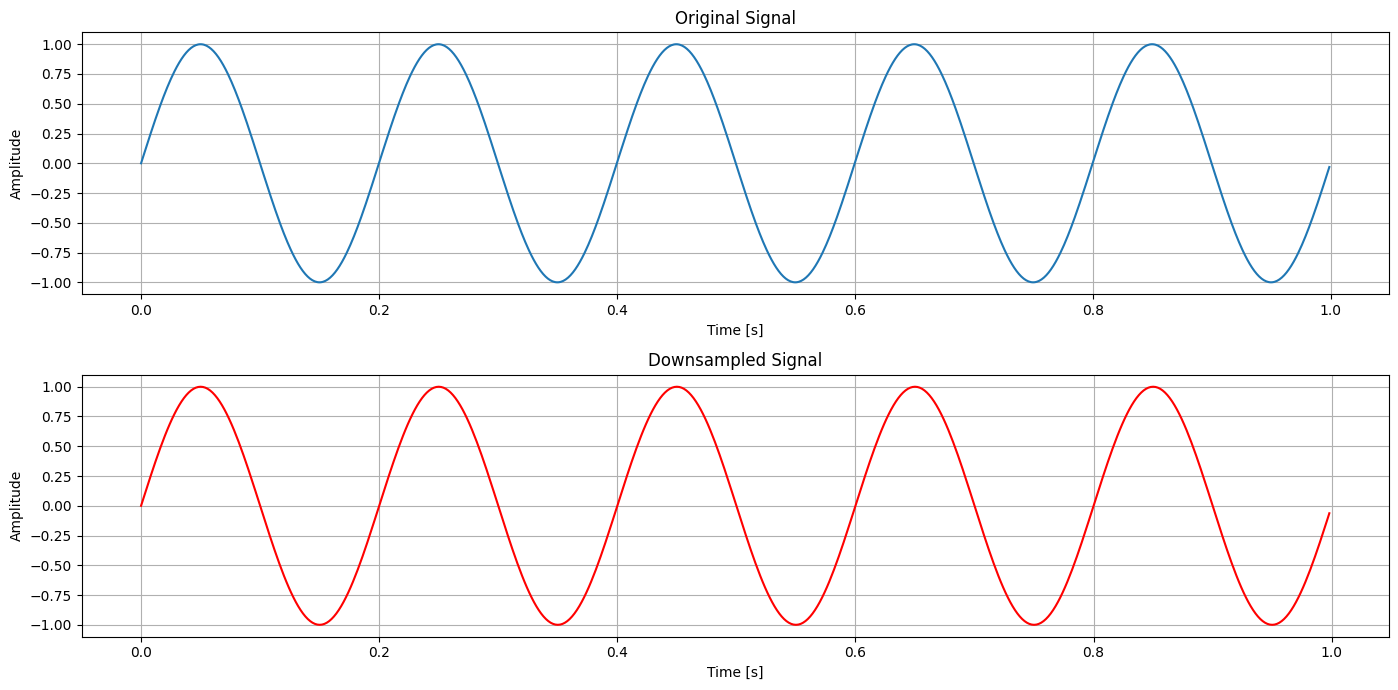

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vamos criar um sinal de exemplo - uma onda senoidal
fs = 1000  # Frequência de amostragem original (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Vetor de tempo para 1 segundo
f = 5  # Frequência da onda senoidal (Hz)

# Criando o sinal original
signal = np.sin(2 * np.pi * f * t)

# Downsampling do sinal - reduzindo a frequência de amostragem pela metade
downsampled_fs = fs // 2
downsampled_signal = signal[::2]  # Pegando uma a cada duas amostras

# Plotando ambos os sinais para comparação
plt.figure(figsize=(14, 7))

# Sinal original
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Sinal com downsampling
downsampled_t = np.linspace(0, 1, downsampled_fs, endpoint=False)
plt.subplot(2, 1, 2)
plt.plot(downsampled_t, downsampled_signal, color='r', label='Downsampled Signal')
plt.title('Downsampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


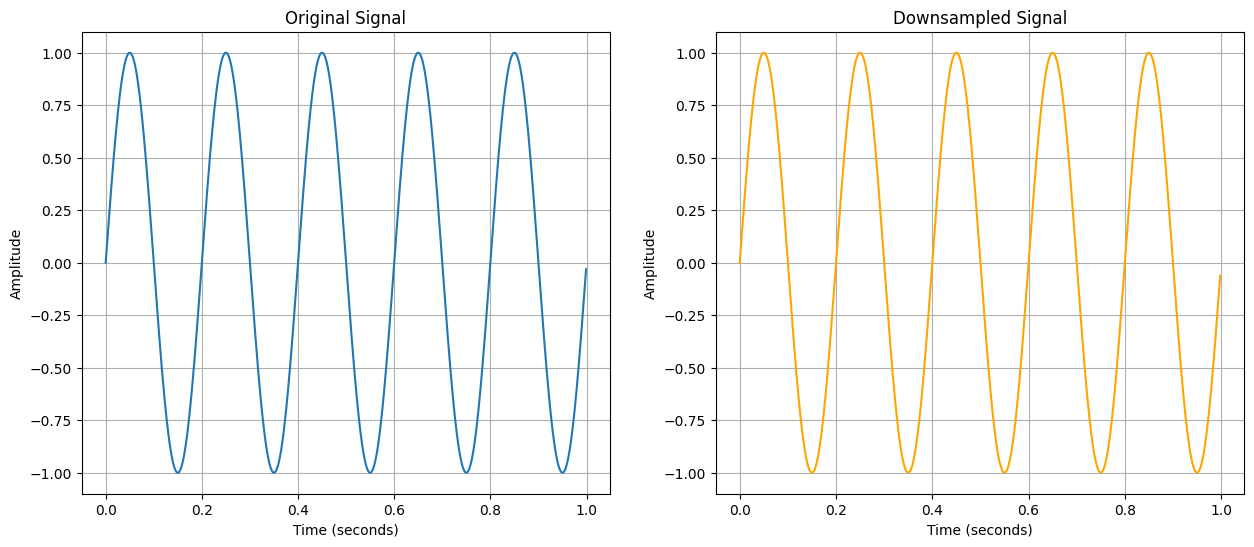

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple audio signal - a sine wave
fs = 1000  # Original sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second of data
frequency = 5  # Frequency of the sine wave in Hz

# Original audio signal
original_signal = np.sin(2 * np.pi * frequency * t)

# Performing downsampling of the signal by a factor of 2
downsampling_factor = 2
downsampled_signal = original_signal[::downsampling_factor]
downsampled_t = t[::downsampling_factor]

# Plotting the signals for comparison
plt.figure(figsize=(15, 6))

# Original signal
plt.subplot(1, 2, 1)
plt.plot(t, original_signal, label='Original')
plt.title('Original Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

# Downsampled signal
plt.subplot(1, 2, 2)
plt.plot(downsampled_t, downsampled_signal, label='Downsampled', color='orange')
plt.title('Downsampled Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)


In [2]:
import datasets
datasets.__version__

'2.19.0'

In [3]:
import sentence_transformers
sentence_transformers.__version__

'2.7.0'

In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [2]:
stop_words_path = "/home/brunodifranco/mestrado/mestrado-ufrgs-cmp617-tce/src/utils/stop_words_bertopic.txt"

In [3]:
data_cleaning_pipeline = DataCleaning()
df = data_cleaning_pipeline.run()

data = Dataset.from_pandas(df)
docs = data["DS_OBJETO"]

2024-04-20 01:01:04 - INFO - Data loaded!
2024-04-20 01:01:04 - INFO - Null values cleaned!
2024-04-20 01:01:04 - INFO - Data types asserted!
2024-04-20 01:01:04 - INFO - Full data cleaned!


In [15]:
stop_words = []
with open(stop_words_path, "r") as file:
    for row in file:
        stop_words.append(row.strip())


# vectorizer_model = CountVectorizer(
#     stop_words=stop_words,
#     strip_accents="unicode",
#     token_pattern=r"(?u)\\b[A-Za-z]+\\b",  # Remove numbers
# )
# # Filtering docs that are completely null after stopwords removal
# vec = vectorizer_model.fit_transform(docs)
# doc_lengths = vec.sum(axis=1)
# non_empty_docs = doc_lengths > 0

In [16]:
# Lista de stop words, ajuste conforme necessário
# stop_words = ['a', 'e', 'o', 'as', 'os']

# vectorizer_model = CountVectorizer(
#     stop_words=stop_words,
#     strip_accents="unicode",
#     token_pattern=r'(?u)\b[A-Za-zÀ-ÿ]+\b'  # Regex ajustado para aceitar letras com e sem acentos, excluindo números
    
# )

vectorizer_model = CountVectorizer(
    stop_words=stop_words,
    strip_accents="unicode",
    token_pattern=r'(?u)\b[A-Za-zÀ-ÿ]{4,}\b'  # Regex ajustado para aceitar letras com 4 ou mais caracteres
)


# # Supondo que corpus seja uma lista de documentos de texto
# corpus = [
#     "com número 1234",
#     "Outro  sem número",
#     "Apenas um asgfdgdrfgdf6789"
# ]

X = vectorizer_model.fit_transform(docs)

/home/brunodifranco/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estao', 'estavamos', 'estiveramos', 'estivessemos', 'foramos', 'fossemos', 'houveramos', 'houverao', 'houveriamos', 'houvessemos', 'sera', 'seriamos', 'tambem', 'tera', 'terao', 'teriamos', 'tinhamos', 'tiveramos', 'tivessemos', 'voce', 'voces'] not in stop_words.
  warnings.warn(


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Lista de stop words, ajuste conforme necessário
stop_words = ['a', 'e', 'o', 'as', 'os']

# Definindo o modelo com as configurações atualizadas
vectorizer_model = CountVectorizer(
    stop_words=stop_words,
    strip_accents="unicode",
    token_pattern=r'(?u)\b[A-Za-zÀ-ÿ]+\b'  # Regex ajustado para aceitar letras com e sem acentos, excluindo números
)

# Supondo que corpus seja uma lista de documentos de texto
corpus = [
    "Exemplo com número 1234",
    "Outro exemplo sem número",
    "Apenas um exemplo 6789"
]

# Aplicando o vectorizer ao corpus
X = vectorizer_model.fit_transform(corpus)
feature_names = vectorizer_model.get_feature_names_out()
matrix = X.toarray()

feature_names, matrix

(array(['apenas', 'com', 'exemplo', 'numero', 'outro', 'sem', 'um'],
       dtype=object),
 array([[0, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0],
        [1, 0, 1, 0, 0, 0, 1]]))

In [54]:
vec = vectorizer_model.fit_transform(docs)

/home/brunodifranco/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estao', 'estavamos', 'estiveramos', 'estivessemos', 'foramos', 'fossemos', 'ha', 'hao', 'houveramos', 'houverao', 'houveriamos', 'houvessemos', 'ja', 'sera', 'seriamos', 'so', 'tambem', 'tera', 'terao', 'teriamos', 'tinhamos', 'tiveramos', 'tivessemos', 'voce', 'voces'] not in stop_words.
  warnings.warn(


In [55]:
doc_lengths = vec.sum(axis=1)
non_empty_docs = doc_lengths > 0

# Filtre o DataFrame original e a matriz de documentos
df_filtered = df[non_empty_docs]
# vec_filtered = vec[non_empty_docs]

# # Atualize o DataFrame `df` e a matriz `vec` com os documentos não nulos
# df = df_filtered
# vec = vec_filtered

In [61]:
import pickle

In [57]:
data = Dataset.from_pandas(df_filtered)
docs = data["DS_OBJETO"]

In [62]:
path = "models/bertopic/inputs/"

In [63]:
pickle.dump(docs, open(path + "docs.pkl", "wb"))